In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer, KNNImputer

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import pickle
# import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data_path1 = './Dataset2/Expanded_data_with_more_features.csv'

df1 = pd.read_csv(data_path1).drop('Unnamed: 0', axis=1)

df1.shape

(30641, 14)

In [3]:
df1.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.000000,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.000000,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.000000,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.000000,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,76,78,75


In [4]:
df1.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore'], dtype='object')

In [5]:
cat_cols = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', \
           'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']
num_cols = ['MathScore', 'ReadingScore', 'WritingScore']

len(cat_cols), len(num_cols), df1.shape

(11, 3, (30641, 14))

In [6]:
df1[num_cols].head()

,MathScore,ReadingScore,WritingScore
0,71,71,74
1,69,90,88
2,87,93,91
3,45,56,42
4,76,78,75


In [7]:
df1[num_cols].describe()

,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


MathScore


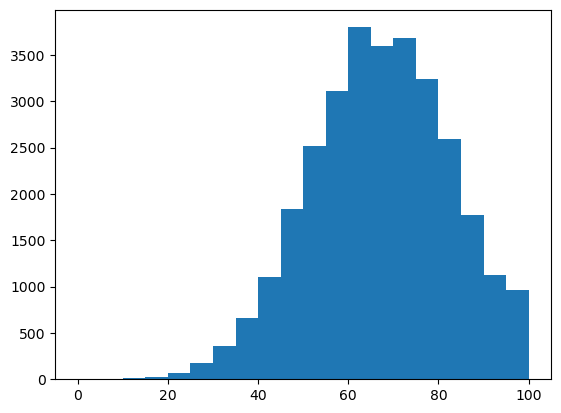

In [8]:
print(num_cols[0])
plt.hist(df1[num_cols[0]], bins=20)
plt.show()

ReadingScore


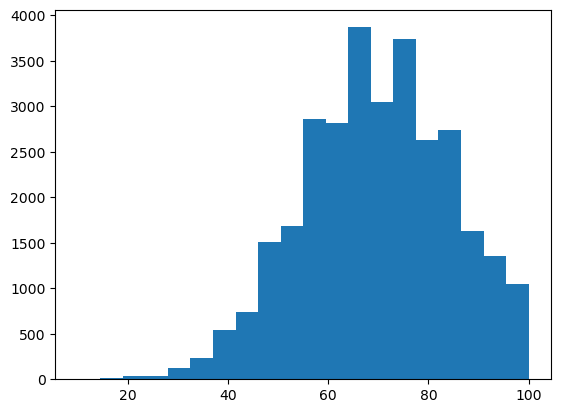

In [9]:
print(num_cols[1])
plt.hist(df1[num_cols[1]], bins=20)
plt.show()

WritingScore


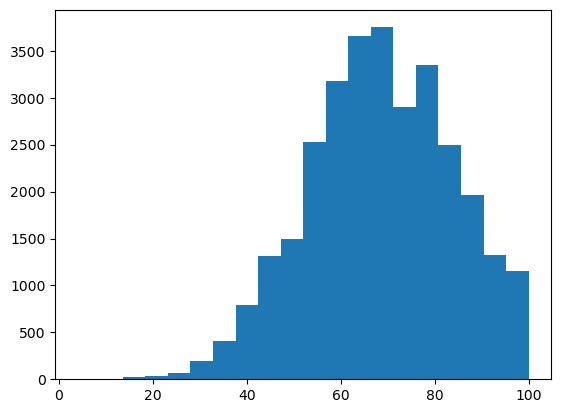

In [10]:
print(num_cols[2])
plt.hist(df1[num_cols[2]], bins=20)
plt.show()

In [11]:
df_counts = df1['NrSiblings'].value_counts().reset_index()
df_counts.columns = ['NrSiblings', 'Count']
df_counts

,NrSiblings,Count
0,1.000000,8217
1,2.000000,6790
2,3.000000,6123
3,0.000000,3085
4,4.000000,2941
5,5.000000,1320
6,6.000000,302
7,7.000000,291


<BarContainer object of 8 artists>

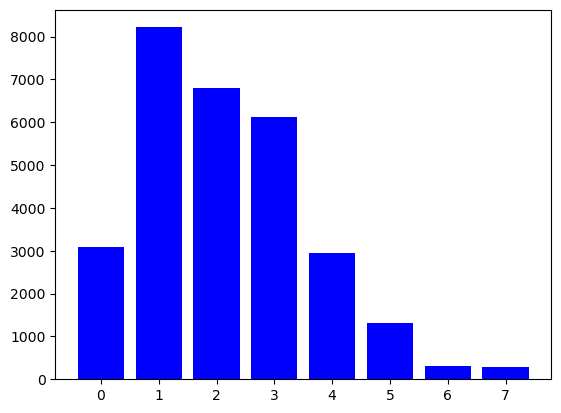

In [12]:
plt.bar(df_counts['NrSiblings'], df_counts['Count'], color='blue')

In [13]:
df1[cat_cols].head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.000000,school_bus,< 5
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.000000,NaN,5 - 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.000000,school_bus,< 5
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.000000,NaN,5 - 10
4,male,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10


In [14]:
for c in cat_cols:
    print(f'Num nulls for {c} = {df1[c].isna().sum()}')

Num nulls for Gender = 0
Num nulls for EthnicGroup = 1840
Num nulls for ParentEduc = 1845
Num nulls for LunchType = 0
Num nulls for TestPrep = 1830
Num nulls for ParentMaritalStatus = 1190
Num nulls for PracticeSport = 631
Num nulls for IsFirstChild = 904
Num nulls for NrSiblings = 1572
Num nulls for TransportMeans = 3134
Num nulls for WklyStudyHours = 955


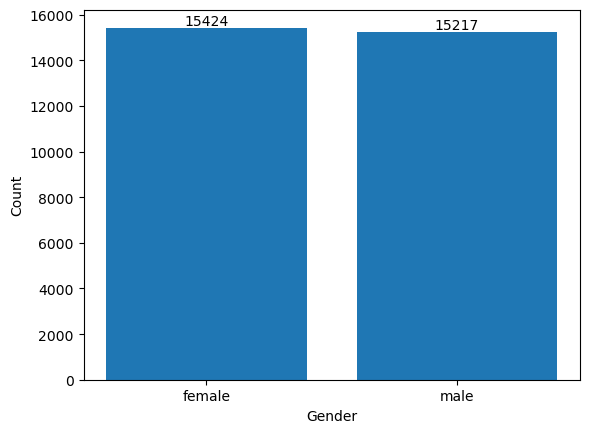

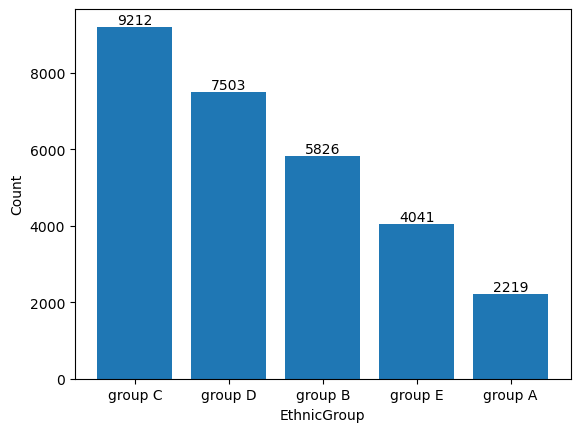

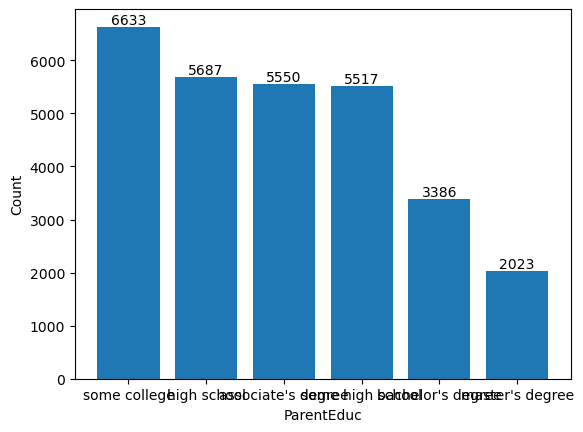

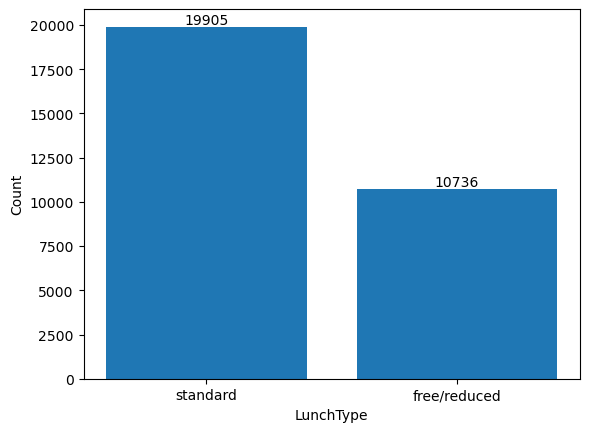

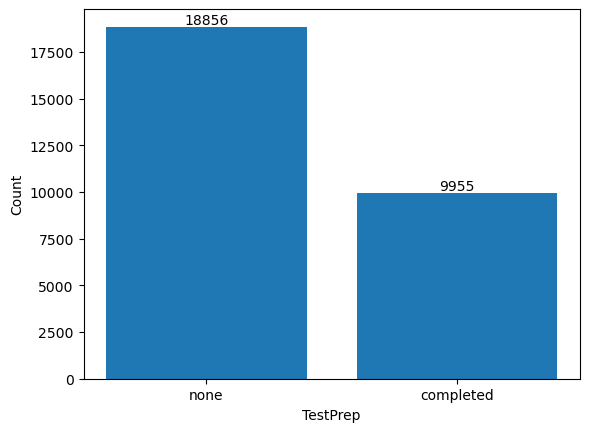

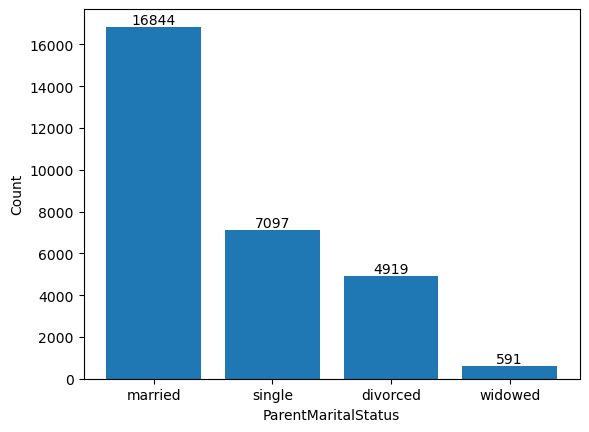

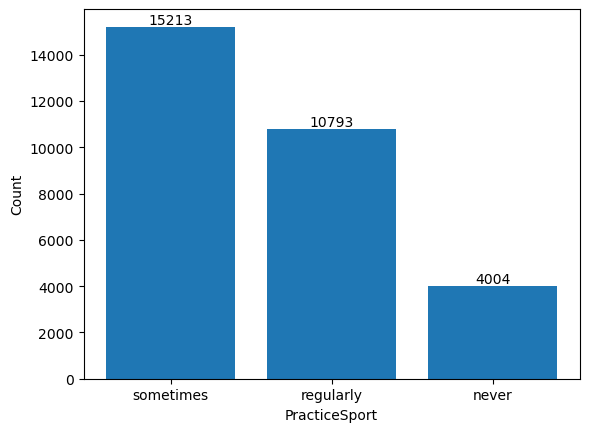

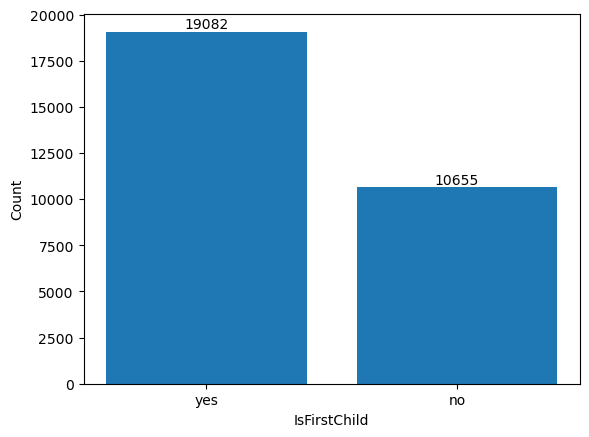

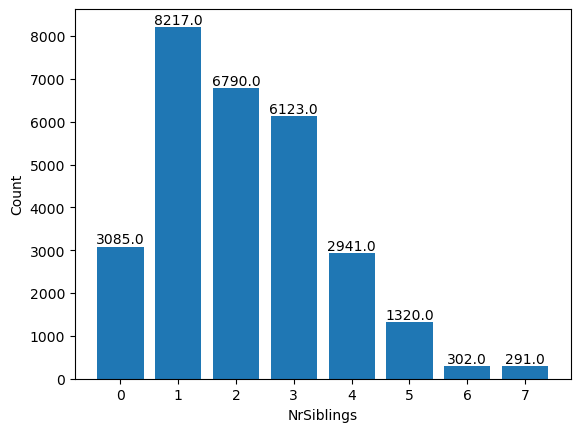

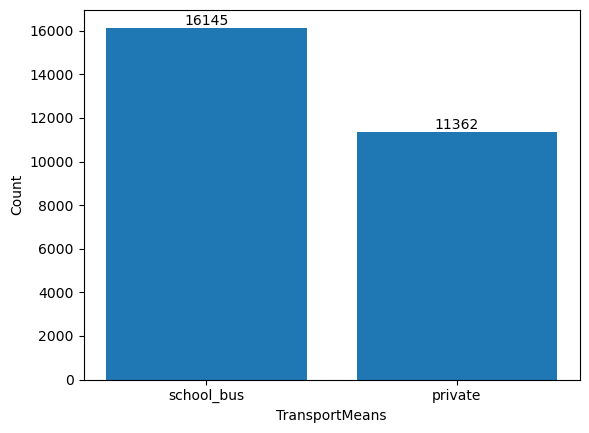

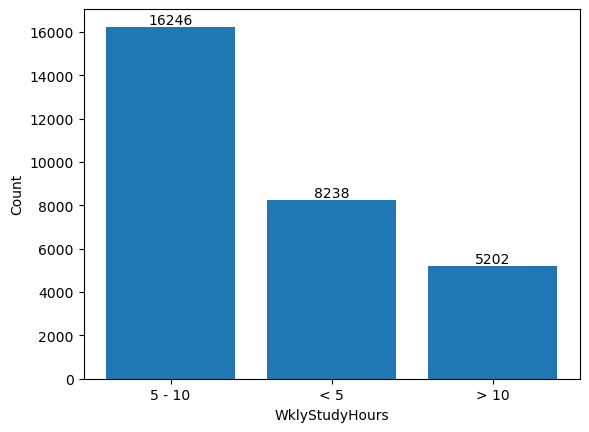

In [19]:
for c in cat_cols:
    # print(df1[c].value_counts())
    df_counts = df1[c].value_counts().reset_index()
    df_counts.columns = [c, 'Count']
    plt.bar(df_counts[c], df_counts['Count']) # , color='blue'
    
    for index, row in df_counts.iterrows():
        plt.text(row[c], row['Count'], str(row['Count']), ha='center', va='bottom')
    
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

## Impute all missing cat cols with Mode

In [30]:
df2 = df1.copy()
for c in cat_cols:
    print(df2[c].value_counts())
    df2[c].fillna(df2[c].mode()[0], inplace=True)
    print(df2[c].value_counts(), '\n')

female    15424
male      15217
Name: Gender, dtype: int64
female    15424
male      15217
Name: Gender, dtype: int64 

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64
group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: EthnicGroup, dtype: int64 

some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64
some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64 

standard        19905
free/reduced    10736
Name: LunchType, dtype: int64
standard        19905
free/reduced    10736
Name: LunchType, dtype: int64 

none         18856
completed     9955
Name: TestPrep, dtype: int64
none         20686
completed     9955
Name: 

In [36]:
for c in df2.columns:
    print(f'Num nulls for {c} = {df2[c].isna().sum()}')

Num nulls for Gender = 0
Num nulls for EthnicGroup = 0
Num nulls for ParentEduc = 0
Num nulls for LunchType = 0
Num nulls for TestPrep = 0
Num nulls for ParentMaritalStatus = 0
Num nulls for PracticeSport = 0
Num nulls for IsFirstChild = 0
Num nulls for NrSiblings = 0
Num nulls for TransportMeans = 0
Num nulls for WklyStudyHours = 0
Num nulls for MathScore = 0
Num nulls for ReadingScore = 0
Num nulls for WritingScore = 0


## All predictor variables are Categorical. Do One Hot Encoding for all of these

### Blindly doing OHE

In [38]:
df3 = df2.copy()

df3 = pd.get_dummies(df3, columns=cat_cols)

df3.columns

Index(['MathScore', 'ReadingScore', 'WritingScore', 'Gender_female', 'Gender_male', 'EthnicGroup_group A', 'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E', 'ParentEduc_associate's degree', 'ParentEduc_bachelor's degree', 'ParentEduc_high school', 'ParentEduc_master's degree', 'ParentEduc_some college', 'ParentEduc_some high school', 'LunchType_free/reduced', 'LunchType_standard', 'TestPrep_completed', 'TestPrep_none', 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_married', 'ParentMaritalStatus_single', 'ParentMaritalStatus_widowed', 'PracticeSport_never', 'PracticeSport_regularly', 'PracticeSport_sometimes', 'IsFirstChild_no', 'IsFirstChild_yes', 'NrSiblings_0.0', 'NrSiblings_1.0', 'NrSiblings_2.0', 'NrSiblings_3.0', 'NrSiblings_4.0', 'NrSiblings_5.0', 'NrSiblings_6.0', 'NrSiblings_7.0', 'TransportMeans_private', 'TransportMeans_school_bus', 'WklyStudyHours_5 - 10', 'WklyStudyHours_< 5', 'WklyStudyHours_> 10'], dtype='object')

In [39]:
df3.head()

,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,LunchType_free/reduced,LunchType_standard,TestPrep_completed,TestPrep_none,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,NrSiblings_0.0,NrSiblings_1.0,NrSiblings_2.0,NrSiblings_3.0,NrSiblings_4.0,NrSiblings_5.0,NrSiblings_6.0,NrSiblings_7.0,TransportMeans_private,TransportMeans_school_bus,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,71,71,74,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0
2,87,93,91,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,45,56,42,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0


### OHE with some logic

In [72]:
df2.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.000000,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.000000,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.000000,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.000000,school_bus,5 - 10,76,78,75


In [73]:
df4 = df2.copy()

In [74]:
for c in cat_cols:
    print(df4[c].value_counts(), ' \n')

female    15424
male      15217
Name: Gender, dtype: int64  

group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: EthnicGroup, dtype: int64  

some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64  

standard        19905
free/reduced    10736
Name: LunchType, dtype: int64  

none         20686
completed     9955
Name: TestPrep, dtype: int64  

married     18034
single       7097
divorced     4919
widowed       591
Name: ParentMaritalStatus, dtype: int64  

sometimes    15844
regularly    10793
never         4004
Name: PracticeSport, dtype: int64  

yes    19986
no     10655
Name: IsFirstChild, dtype: int64  

1.000000    9789
2.000000    6790
3.000000    6123
0.000000    3085
4.000000    2941
5.000000    1320
6.000000     302
7.000000     291
Name: NrSiblings, dtype: int64  

school_bus    19279
private       

In [75]:
list(df4['WklyStudyHours'].unique())

['< 5', '5 - 10', '> 10']

In [76]:
ParentEduc_mapping = {
 'high school': 0,
 'some high school': 0,
 'some college': 1,
 "bachelor's degree": 2,
 "associate's degree": 2,
 "master's degree": 3,
}
df4['ParentEduc_int'] = df4['ParentEduc'].apply(lambda v: ParentEduc_mapping[v])


TestPrep_mapping = {
    'none': 0,
    'completed': 1
}
df4['TestPrep_int'] = df4['TestPrep'].apply(lambda v: TestPrep_mapping[v])

PracticeSport_mapping = {
    'never': 0,
    'sometimes': 1, 
    'regularly': 2,
}
df4['PracticeSport_int'] = df4['PracticeSport'].apply(lambda v: PracticeSport_mapping[v])

# NrSiblings # Convert to int
df4['NrSiblings'] = df4['NrSiblings'].astype(int)

WklyStudyHours_mapping = {
    '< 5': 0, 
    '5 - 10': 1, 
    '> 10': 2
}
df4['WklyStudyHours_int'] = df4['WklyStudyHours'].apply(lambda v: WklyStudyHours_mapping[v])

In [77]:
df4.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,ParentEduc_int,TestPrep_int,PracticeSport_int,WklyStudyHours_int
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,2,0,2,0
1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,69,90,88,1,0,1,1
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,3,0,1,0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42,2,0,0,1
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75,1,0,1,1


In [66]:
cols_to_ohe = ['Gender', 'EthnicGroup', 'LunchType', 'ParentMaritalStatus', 'IsFirstChild', 'TransportMeans']

df4 = pd.get_dummies(df4, columns=cols_to_ohe)

df4.columns

Index(['ParentEduc', 'TestPrep', 'PracticeSport', 'NrSiblings', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'ParentEduc_int', 'TestPrep_int', 'PracticeSport_int', 'WklyStudyHours_int', 'Gender_female', 'Gender_male', 'EthnicGroup_group A', 'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E', 'LunchType_free/reduced', 'LunchType_standard', 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_married', 'ParentMaritalStatus_single', 'ParentMaritalStatus_widowed', 'IsFirstChild_no', 'IsFirstChild_yes', 'TransportMeans_private', 'TransportMeans_school_bus'], dtype='object')

In [67]:
df4.head()

,ParentEduc,TestPrep,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,ParentEduc_int,TestPrep_int,PracticeSport_int,WklyStudyHours_int,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_free/reduced,LunchType_standard,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus
0,bachelor's degree,none,regularly,3,< 5,71,71,74,2,0,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,some college,none,sometimes,0,5 - 10,69,90,88,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
2,master's degree,none,sometimes,4,< 5,87,93,91,3,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
3,associate's degree,none,never,1,5 - 10,45,56,42,2,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,some college,none,sometimes,0,5 - 10,76,78,75,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1


In [68]:
modeling_cols = ['ParentEduc_int', 'TestPrep_int', 'PracticeSport_int', 'WklyStudyHours_int', 
                 'Gender_female', 'Gender_male', 
                 'EthnicGroup_group A', 'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E', 
                 'LunchType_free/reduced', 'LunchType_standard', 
                 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_married', 'ParentMaritalStatus_single', 'ParentMaritalStatus_widowed',
                 'IsFirstChild_no', 'IsFirstChild_yes', 
                 'TransportMeans_private', 'TransportMeans_school_bus', 
                 'MathScore', 'ReadingScore', 'WritingScore', 
                ]

modeling_df = df4[modeling_cols]


modeling_df.head()


,ParentEduc_int,TestPrep_int,PracticeSport_int,WklyStudyHours_int,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_free/reduced,LunchType_standard,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus,MathScore,ReadingScore,WritingScore
0,2,0,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,71,71,74
1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,69,90,88
2,3,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,87,93,91
3,2,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,45,56,42
4,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,76,78,75


In [69]:
modeling_df.to_csv('modeling_df.csv', index=False)

In [78]:
modeling_df.shape

(30641, 24)

In [79]:
modeling_df['MathScore'].describe()

count   30641.000000
mean       66.558402
std        15.361616
min         0.000000
25%        56.000000
50%        67.000000
75%        78.000000
max       100.000000
Name: MathScore, dtype: float64

# Adding Fake data

In [82]:
sorted(list(modeling_df.columns))

['EthnicGroup_group A',
 'EthnicGroup_group B',
 'EthnicGroup_group C',
 'EthnicGroup_group D',
 'EthnicGroup_group E',
 'Gender_female',
 'Gender_male',
 'IsFirstChild_no',
 'IsFirstChild_yes',
 'LunchType_free/reduced',
 'LunchType_standard',
 'MathScore',
 'ParentEduc_int',
 'ParentMaritalStatus_divorced',
 'ParentMaritalStatus_married',
 'ParentMaritalStatus_single',
 'ParentMaritalStatus_widowed',
 'PracticeSport_int',
 'ReadingScore',
 'TestPrep_int',
 'TransportMeans_private',
 'TransportMeans_school_bus',
 'WklyStudyHours_int',
 'WritingScore']

In [81]:
modeling_df.shape

(30641, 24)

In [86]:
int_cols = modeling_df.select_dtypes(include='int').columns
cat_cols = modeling_df.select_dtypes(exclude='int').columns

len(int_cols), len(cat_cols)

(7, 17)

In [87]:
int_cols

Index(['ParentEduc_int', 'TestPrep_int', 'PracticeSport_int', 'WklyStudyHours_int', 'MathScore', 'ReadingScore', 'WritingScore'], dtype='object')

In [99]:
num_additional_data = 20000

# additional_data = pd.DataFrame()
new_data_list = []

for _ in range(num_additional_data):    
    new_data = {}
    for cc in cat_cols:    
        new_data[cc] = np.random.choice(modeling_df[cc])

    for ic in int_cols:    
        # minval, maxval = min(modeling_df[ic]), max(modeling_df[ic])
        # new_data[ic] = np.random.randint(minval, maxval+1)
        new_data[ic] = np.random.choice(modeling_df[ic])
    
    new_data_list.append(new_data)
        
print(len(new_data_list))
additional_data = pd.DataFrame().from_records(new_data_list)

modeling_df1 = pd.concat([modeling_df, additional_data], ignore_index=True)

modeling_df1.shape

20000


(50641, 24)

In [100]:
num_cols

['MathScore', 'ReadingScore', 'WritingScore']

MathScore


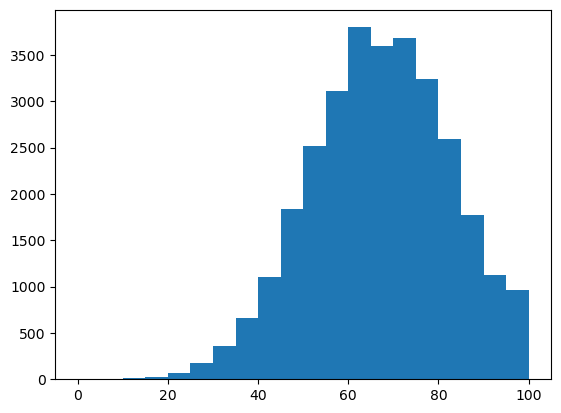

In [101]:
print(num_cols[0])
plt.hist(modeling_df[num_cols[0]], bins=20)
plt.show()

MathScore


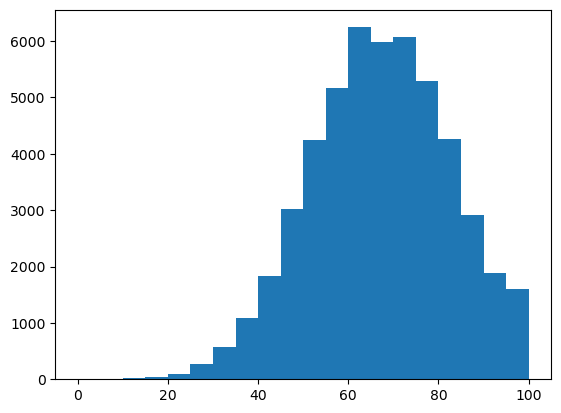

In [102]:
print(num_cols[0])
plt.hist(modeling_df1[num_cols[0]], bins=20)
plt.show()

In [103]:
modeling_df1.to_csv('modeling_df1.csv', index=False)

In [104]:
modeling_df1.shape

(50641, 24)